In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import Circle

In [2]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

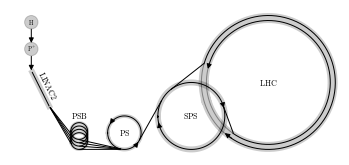

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xticks([]) 
ax.set_yticks([]) 

font_size = 8

#Axis arrows
top = 2.2
head_size = 16

#ax.axis('tight')
ax.axis('off')

#ax.set_aspect('equal')
ax.set_xlim([-5,5])
ax.set_ylim([-2.25,2.25])

style = '-|>'
head_length = 0.8
head_width = 0.8

#LHC
x_shift_LHC = 2.8
y_shift_LHC = 0
roll = 95

r_LHC1 = np.ones(100)*2
theta_c = np.roll(np.arange(-np.pi,np.pi+0.1,(2*np.pi+0.1)/100.),roll)
x_LHC1 = r_LHC1*np.cos(theta_c)
y_LHC1 = r_LHC1*np.sin(theta_c)

scale = 0.925
x_LHC2 = scale*np.flip(x_LHC1,0)
y_LHC2 = scale*np.flip(y_LHC1,0)

x_LHC1 += x_shift_LHC
x_LHC2 += x_shift_LHC
y_LHC1 += y_shift_LHC
y_LHC2 += y_shift_LHC
index = 10
end = 90

bl_scale = 0.5*(scale+1)
ax.plot(x_LHC1*bl_scale+0.1,y_LHC1*bl_scale,color='Black',alpha=0.2,lw=10)

ax.plot(x_LHC1[index:end],y_LHC1[index:end],color='Black')
ax.plot(np.hstack([x_LHC1[end-1:],x_LHC1[:index]]),
        np.hstack([y_LHC1[end-1:],y_LHC1[:index]]),
        color='Grey',ls='-')

ax.annotate("",
            xy=(x_LHC1[index-2],y_LHC1[index-2]),
            xytext=(x_LHC1[index+1],y_LHC1[index+1]),
            xycoords='data',
            arrowprops=dict(arrowstyle=style,  
                            color='Black',
                            connectionstyle="arc3"))

ax.plot(x_LHC2[index:end],y_LHC2[index:end],color='Black')
ax.plot(np.hstack([x_LHC2[end-1:],x_LHC2[:index]]),
        np.hstack([y_LHC2[end-1:],y_LHC2[:index]]),
        color='Grey',ls='-')

ax.annotate("",
            xy=(x_LHC2[index-1],y_LHC2[index-1]),
            xytext=(x_LHC2[index],y_LHC2[index]),
            xycoords='data',
            arrowprops=dict(arrowstyle=style,
                            color='Black',
                            connectionstyle="arc3"))
ax.text(x_shift_LHC,y_shift_LHC,"$\mathrm{LHC}$",
        color='Black',size=font_size,
        horizontalalignment='center',
        verticalalignment='center'
       )

#SPS
ax.text(0.5,-1,"$\mathrm{SPS}$",
        color='Black',size=font_size,
        horizontalalignment='center',
        verticalalignment='center'
       )
r_SPS = np.ones(100)
x_SPS = r_SPS*np.cos(theta_c)+.5
y_SPS = r_SPS*np.sin(theta_c)-1
ax.plot(x_SPS,y_SPS,color='Black',lw=6,alpha=0.2)
ax.plot(x_SPS,y_SPS,color='Black')
index_sps = 98
ax.annotate("",
            xy=(x_SPS[index_sps],y_SPS[index_sps]),
            xytext=(x_SPS[index_sps+1],y_SPS[index_sps+1]),
            xycoords='data',
            arrowprops=dict(arrowstyle=style,
                            color='Black',
                            connectionstyle="arc3"))
index_sps -= 50
ax.annotate("",
            xy=(x_SPS[index_sps],y_SPS[index_sps]),
            xytext=(x_SPS[index_sps+1],y_SPS[index_sps+1]),
            xycoords='data',
            arrowprops=dict(arrowstyle=style,
                            color='Black',
                            connectionstyle="arc3"))

ax.annotate("",
            xy=(x_SPS[80],y_SPS[80]),
            xytext=(x_LHC1[end-1]+0.05,y_LHC1[end-1]+0.05),
            xycoords='data',
            arrowprops=dict(arrowstyle='-',
                            color='Black',
                            connectionstyle="arc3"))
ax.annotate("",
            xy=(x_SPS[50],y_SPS[50]),
            xytext=(x_LHC2[end-1]+0.04,y_LHC2[end-1]-0.06),
            xycoords='data',
            arrowprops=dict(arrowstyle='-',
                            color='Black',
                            connectionstyle="arc3"))

#PS
r_PS = np.ones(100)*0.5
x_PS = r_PS*np.cos(theta_c)-1.5
y_PS = r_PS*np.sin(theta_c)-1.5
ax.text(-1.5,-1.5,"$\mathrm{PS}$",
        color='Black',size=font_size,
        horizontalalignment='center',
        verticalalignment='center'
       )

ax.plot(x_PS,y_PS,color='Black',lw=4,alpha=0.2)
ax.plot(x_PS,y_PS,color='Black')

index_ps = 85
ax.annotate("",
            xy=(x_PS[index_ps],y_PS[index_ps]),
            xytext=(x_PS[index_ps-1],y_PS[index_ps-1]),
            xycoords='data',
            arrowprops=dict(arrowstyle=style,
                            color='Black',
                            connectionstyle="arc3"))
ax.annotate("",
            xy=(x_PS[index_ps-50],y_PS[index_ps-50]),
            xytext=(x_PS[index_ps-51],y_PS[index_ps-51]),
            xycoords='data',
            arrowprops=dict(arrowstyle=style,
                            color='Black',
                            connectionstyle="arc3"))

ax.annotate("",
            xy=(x_PS[35],y_PS[35]),
            xytext=(x_SPS[85],y_SPS[85]),
            xycoords='data',
            arrowprops=dict(arrowstyle='-',
                            color='Black',
                            connectionstyle="arc3"))

#PSB
r_PSB = np.ones(100)*0.25
x_PSB = r_PSB*np.cos(theta_c)-2.85
y_PSB = r_PSB*np.sin(theta_c)-1.75

ax.text(-2.85,-1,"$\mathrm{PSB}$",
        color='Black',size=font_size,
        horizontalalignment='center',
        verticalalignment='center'
       )



for i in range(4):
    ax.plot(x_PSB,y_PSB+i*0.10,color='Black',lw=3,alpha=0.2)
    ax.plot(x_PSB,y_PSB+i*0.10,color='Black')
    ax.annotate("",
            xy=(x_PSB[18]-0.02,y_PSB[18]+i*0.10),
            xytext=(x_PS[18],y_PS[18]),
            xycoords='data',
            arrowprops=dict(arrowstyle='-',
                            color='Black',
                            connectionstyle="arc3"))

#LINAC2

x_linac = [-4.25,-3.75]
y_linac = [0.3,-0.7]


label_angle = 180*np.arctan2(y_linac[1]-y_linac[0],x_linac[1]-x_linac[0])/np.pi

ax.plot(x_linac,y_linac,color='Black',lw=6,alpha=0.2)
ax.plot(x_linac,y_linac,color='Black')
ax.text(0.5*(x_linac[0]+x_linac[1])+0.2,
        0.5*(y_linac[0]+y_linac[1])+0.1,
        "$\mathrm{LINAC2}$",
        rotation=label_angle,
        color='Black',size=font_size,
        horizontalalignment='center',
        verticalalignment='center'
       )

for i in range(4):
    ax.annotate("",
            xy=(x_PSB[2],y_PSB[2]+i*0.1),
            xytext=(x_linac[-1],y_linac[-1]),
            xycoords='data',
            arrowprops=dict(arrowstyle='-',
                            color='Black',
                            connectionstyle="arc3"))
    
#Proton Source
x_proton,y_proton = -4.28,1
ax.text(x_proton,y_proton,"$\mathrm{P}^{+}$",
        color='Black',size=font_size-2,
        horizontalalignment='center',
        verticalalignment='center'
       )
circle = Circle((x_proton, y_proton), 0.2, alpha=0.2, color='Black')
ax.add_patch(circle)
ax.annotate("",
            xy=(x_linac[0]-0.03,y_linac[0]),
            xytext=(x_proton,y_proton-0.16),
            xycoords='data',
            arrowprops=dict(arrowstyle='-|>',
                            color='Black',
                            connectionstyle="arc3"))

#Hydrogen Source
x_hydro,y_hydro = -4.28,1.8
ax.text(x_hydro,y_hydro,"$\mathrm{H}$",
        color='Black',size=font_size-2,
        horizontalalignment='center',
        verticalalignment='center'
       )
circle = Circle((x_hydro, y_hydro), 0.2, alpha=0.2, color='Black')
ax.add_patch(circle)
ax.annotate("",
            xy=(x_proton,y_proton+0.12),
            xytext=(x_hydro,y_hydro-0.15),
            xycoords='data',
            arrowprops=dict(arrowstyle='-|>',
                            color='Black',
                            connectionstyle="arc3"))

ax.set_aspect('equal')
plt.savefig('accel_chain.pdf', bbox_inches='tight', pad_inches=0)
plt.show()